In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

**Carregamento da base de dados**: Utilizando a **função read** do panda, iremos ler e criar um DataFrame a partir do arquivo original. Neste arquivo em questão o delimitador não é uma vírgula (,) e sim o ponto e vírgulo (;), desta forma, precisamos indicar o delimitador correto por meio do parâmetro **sep.**

In [2]:
dados_gestantes = pd.read_csv('dadosgestantes.csv', sep=';')

In [3]:
#Tamanho do dataframe: linhas e colunas, respectivamente.
dados_gestantes.shape

(17, 4)

In [4]:
#Visão geral dos dados
dados_gestantes.head()

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto
0,A,45.0,26.0,3
1,B,38.0,28.0,3
2,C,29.0,34.0,0
3,D,37.0,34.0,0
4,E,23.0,36.0,0


In [5]:
#verificando dados nulos em cada coluna
dados_gestantes.isnull().sum()

Paciente                        0
Idade da gestante               2
Idade gestacional em semanas    2
dias entre infeccao e parto     0
dtype: int64

In [6]:
#verificando se há dados duplicados por meio da coluna: 'Paciente'
dados_gestantes['Paciente'].duplicated().sum()

0

In [7]:
#Verificando as estatísticas descritivas das colunas numéricas:
dados_gestantes.describe()

,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto
count,15.000000,15.000000,17.000000
mean,30.533333,30.133333,35.823529
std,6.854265,7.799878,56.714455
min,22.000000,8.000000,0.000000
25%,26.000000,27.000000,3.000000
50%,29.000000,34.000000,12.000000
75%,35.500000,34.500000,46.000000
max,45.000000,38.000000,231.000000


In [8]:
#Buscando os valores nulos da coluna 'idade da gestante':
dados_gestantes[dados_gestantes['Idade da gestante'].isnull()]

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto
15,P,NaN,NaN,53
16,Q,NaN,NaN,6


In [9]:
#Usamos o método fillna(30, inplace=True) para preencher os valores nulos na coluna com um valor específico, neste caso, a média.
dados_gestantes['Idade da gestante'].fillna(30, inplace=True)

In [10]:
#Buscando novamente os valores nulos da coluna 'idade da gestante':
dados_gestantes[dados_gestantes['Idade da gestante'].isnull()]

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto


Outra forma de substituir os valores é por meio do método loc.   **dados_gestantes.loc[dados_gestantes['Idade da gestante'].isnull(), 'Idade da gestante'] = 30**. Neste caso o método Loc seleciona as linhas correspondentes onde a série booleana é True. Neste exemplo, a série booleana apresenta True nas posições onde os valores são nulos e False onde não são. Posteriormente,atribuimos o valor 30 às posições selecionadas pelas linhas e coluna especificadas, substituindo os valores nulos.

In [11]:
#Verificar a ocorrência de valores pela coluna 'dias entre infecção e parto' em ordem descrescente.
dados_gestantes.groupby('dias entre infeccao e parto').size().sort_values

<bound method Series.sort_values of dias entre infeccao e parto
0      4
3      2
4      1
6      1
12     1
26     1
33     1
42     1
46     1
53     1
74     1
76     1
231    1
dtype: int64>

Agora queremos criar um **Histograma em relação ao intervalo entre a infecção e o parto(dias)**   Explicando o código: **np.histogram():**   Essa função é parte da biblioteca NumPy (np) e é usada para calcular a distribuição de frequência dos dados passados para ela. Ela retorna dois valores: o primeiro valor é uma array contendo a contagem de elementos em cada intervalo (ou bin) e o segundo valor é um array contendo as bordas dos bins (os pontos de corte dos intervalos). **['dias entre infeccao e parto']** está selecionando todas as linhas desta coluna, **bins = 7:** Nesse caso, o parâmetro bins é utilizado para especificar o número de intervalos que desejamos na distribuição de frequência. O valor 7 indica que o histograma será dividido em 7 intervalos.

In [12]:
histograma= np.histogram(dados_gestantes['dias entre infeccao e parto'], bins = 7)
histograma

(array([10,  4,  2,  0,  0,  0,  1], dtype=int64),
 array([  0.,  33.,  66.,  99., 132., 165., 198., 231.]))

Perceba que o **primeiro array** representa a contagem de elementos em cada intervalo. O primeiro valor, 10, indica que há 10 elementos no intervalo de 0 a 33, o segundo valor, 4, indica que há 2 elementos no intervalo de 33 a 66, e assim por diante.
**A segunda array** representa as bordas dos bins (pontos de corte dos intervalos).

**É possível percerber que há tres intervalos que ficaram com a contagem de elementos igual a zero**. Um histograma com intervalo de contagem zerada pode levar a interpretações errôneas dos dados e fornecer uma representação distorcida da distribuição dos valores. Existem várias abordagens comuns para ajudar a escolher o número de bins de um histograma: **Regra de Freedman-Diaconis:** A regra é baseada na amplitude interquartil dos dados (a diferença entre o terceiro quartil e o primeiro quartil) e o tamanho do conjunto de dados. A fórmula para calcular o número de bins é: **bins = 2 * (IQR) / (n^(1/3))** IQR: Amplitude interquartil (terceiro quartil - primeiro quartil).n: Número de observações no conjunto de dados.

In [13]:
# Calculando o primeiro quartil (Q1)
q1 = dados_gestantes['dias entre infeccao e parto'].quantile(0.25)

# Calculando o terceiro quartil (Q3)
q3 = dados_gestantes['dias entre infeccao e parto'].quantile(0.75)

# Calcular a amplitude interquartil (IQR)
iqr = q3 - q1
iqr

43.0

In [14]:
# Calcular o número de dados (n)
n = len(dados_gestantes['dias entre infeccao e parto'])

# Calcular o número de bins
bins = 2 * iqr / (n**(1/3))
bins

33.44635621102255

In [15]:
histograma= np.histogram(dados_gestantes['dias entre infeccao e parto'], bins = 33)
histograma

(array([8, 1, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([  0.,   7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.,  70.,
         77.,  84.,  91.,  98., 105., 112., 119., 126., 133., 140., 147.,
        154., 161., 168., 175., 182., 189., 196., 203., 210., 217., 224.,
        231.]))

Notoriamente o histograma ainda não representa uma frequencia de distribuição ideal, um outro método para calcular o número de bins é **Regra de Sturges:** Essa regra é simples e amplamente utilizada, mas pode não ser a melhor escolha para conjuntos de dados muito grandes ou com distribuições complexas. A regra sugere que o número de bins seja igual a **1 + log2(n)**, onde n é o número de observações no conjunto de dados.

In [16]:
#Calculo pela Regra de Sturges, para usar log na base 2 é necessário importar a biblioteca math:

import math
bins_1 = 1 + math.log2(n)
bins_1

5.087462841250339

In [17]:
histograma= np.histogram(dados_gestantes['dias entre infeccao e parto'], bins = 5)
histograma

(array([13,  3,  0,  0,  1], dtype=int64),
 array([  0. ,  46.2,  92.4, 138.6, 184.8, 231. ]))

Verificamos novamente que ainda há intervalos com contagem igual a zero, podemos realizar uma tratativa dos dados por meio da **eliminação dos outliers**. Uma forma de identificar valores discrepantes é aplicando novamente a **amplitude interquartil**

In [18]:
q1 = dados_gestantes['dias entre infeccao e parto'].quantile(0.25)
q3 = dados_gestantes['dias entre infeccao e parto'].quantile(0.75)
iqr = q3 - q1

# Calcula os limites para identificação de outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
print (limite_inferior)
print (limite_superior)

# Identifica os outliers por meio de uma List comprehension, irá retornar x para cada valor de x dentro da variável amplitude
#que ultrapasse o limite inferior ou superior.
outliers = [x for x in dados_gestantes['dias entre infeccao e parto'] if x < limite_inferior or x > limite_superior]
outliers

-61.5
110.5


[231]

Como a medição do único outlier é legítima, podemos optar por subistituir este valor  ao invés de simplesmente removê-lo. Por meio da biblioteca statistics podemos verificar a média e a mediana dos valores.

In [19]:
import statistics

# Calcula a média
media = statistics.mean(dados_gestantes['dias entre infeccao e parto'])

# Calcula a mediana
mediana = statistics.median(dados_gestantes['dias entre infeccao e parto'])

print("Média:", media)
print("Mediana:", mediana)

Média: 35.8235294117647
Mediana: 12


Como a média sofre grande influência dos valores discrepantes, iremos substituir o outlier pela mediana.

In [20]:
# Substitui os outliers pela mediana usando loc
dados_gestantes.loc[(dados_gestantes['dias entre infeccao e parto'] < limite_inferior) | 
                    (dados_gestantes['dias entre infeccao e parto'] > limite_superior), 'dias entre infeccao e parto'] = mediana

In [21]:
#verificamos se ainda existem valores discrepantes
#Usamos o @ para identificar que limite_inferior e limite_superior são variáveis e não strings.
dados_gestantes.query('`dias entre infeccao e parto` < @limite_inferior or `dias entre infeccao e parto` > @limite_superior')

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto


In [22]:
#Agora podemos criar um histograma com base na Regra de Sturges
histograma= np.histogram(dados_gestantes['dias entre infeccao e parto'], bins = 5)
histograma

(array([10,  1,  2,  2,  2], dtype=int64),
 array([ 0. , 15.2, 30.4, 45.6, 60.8, 76. ]))

Text(0.5, 0, 'Dias entre a infecção e o parto')

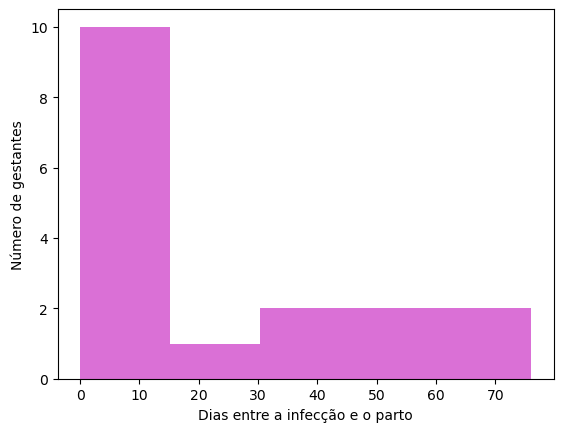

In [23]:
#Histograma corrigido

plt.hist(dados_gestantes['dias entre infeccao e parto'], bins = 5, color= 'orchid')
plt.ylabel('Número de gestantes')
plt.xlabel('Dias entre a infecção e o parto')

Como podemos perceber temos a representação de um **histograma enviesado para direita**, também conhecido como assimétrico à direita ou positivamente enviesado. Essa assimetria indica que existem valores extremamente altos que puxam a média para a direita. **Uma característica comum das distribuições enviesadas para a direita é que a média é maior do que a mediana** (Média: 35.8,
Mediana: 12), uma vez que a média é mais influenciada pelos valores maiores na extremidade direita. Notoriamente, a concentração dos dados está dentro do intervalo de 0 à 15. 

Por meio da biblioteca seaborn podemos traçar um gráfico KDE, **gráfico de densidade kernel**. O KDE é uma forma suavizada de representar a distribuição de dados em um gráfico, semelhante a um histograma, mas com uma aparência mais suave e contínua.  A linha de densidade em um gráfico KDE é um recurso importante para visualizar a **distribuição dos dados**. Ela representa uma estimativa suave da densidade de probabilidade dos dados, ou seja, mostra como os valores estão distribuídos ao longo do eixo horizontal. **Desta forma, podemos identificar a forma da distribuição dos dados**, demonstrando se os dados têm uma distribuição simétrica (forma de sino), assimétrica (à esquerda ou à direita) ou bimodal (com dois picos distintos), o que pode ser útil para entender o comportamento dos dados.

<AxesSubplot:xlabel='dias entre infeccao e parto', ylabel='Density'>

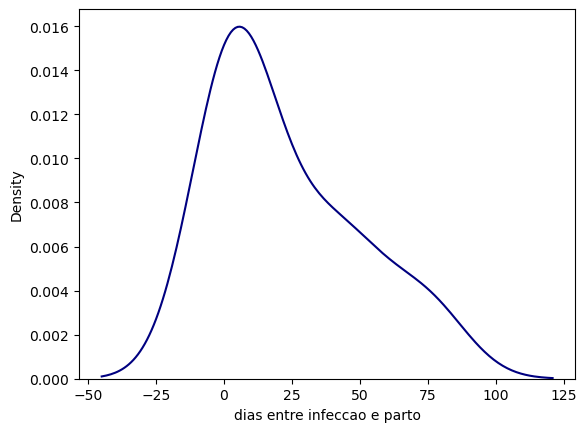

In [24]:
#traçando o gráfico de densidade
sns.kdeplot(dados_gestantes['dias entre infeccao e parto'], color= 'navy')

É possível visualizar que foi gerado um intervalo com uma **distribuição dos dados de forma mais "normal" ou simétrica**, a  Seaborn faz este ajuste especialmente se houver uma grande quantidade de dados em torno de um ponto central. Neste caso, foi escolhido automaticamente um intervalo maior do que o intervalo original dos dados para representar a distribuição com mais precisão. Ao escolher um intervalo maior do que o intervalo original dos dados, o gráfico KDE garante que a estimativa de densidade abrange uma ampla faixa de valores, o que ajuda a revelar informações sobre a forma geral da distribuição e evita que o gráfico pareça limitado por falta de dados além dos limites originais.  O gráfico KDE está fornecendo uma estimativa suave da distribuição dos dados observados. Essa estimativa é útil para visualizar padrões e características da distribuição, mas não implica que a distribuição estimada seja a distribuição real que gerou os dados.

Podemos também gerar um **diagrama de caixa** com os dados sa série **'Idade gestacional em semanas'** demonstrando visualmente a distribuição dos dados desta coluna. Para isto, primeiramente, precisamos tratar os valores nulos presentes nesta série. 

In [25]:
dados_gestantes[dados_gestantes['Idade gestacional em semanas'].isnull()]

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto
15,P,30.0,NaN,53
16,Q,30.0,NaN,6


**Como há valores nulos, iremos utilizar a biblioteca Pandas** ao invés da biblioteca statistics, a biblioteca Pandas ignora os valores nulos. O método **dropna()** é usado para remover os valores nulos da coluna antes do calculo da média e mediana. Há a possibilidade também de utilizar a biblioteca Statistics, sendo necessário aplicar  um filtro: idade_gestacional = dados_gestantes['Idade gestacional em semanas'].dropna().

In [26]:
mediana_idadeg = dados_gestantes['Idade gestacional em semanas'].dropna().median()
media_idadeg = dados_gestantes['Idade gestacional em semanas'].dropna().mean()

print(mediana_idadeg)
print(media_idadeg)

34.0
30.133333333333333


Poderiamos optar por substituir os valores nulos pela mediana, mas **quando analisamos individualmente cada dado**, verificamos que os valores faltantes são de pacientes que tiveram um intervalo maior entre a infecção e o parto, desta forma, a média pode ser mais representativa neste caso específico. Usamos o **método .fillna** para preencher os valores ausentes. Neste caso, todos os valores NaN(Not a Number) na coluna 'Idade gestacional em semanas' serão substituídos pelo valor 'media_idadeg'. **inplace=True**: É um parâmetro opcional, quando inplace=True é usado, as alterações são aplicadas diretamente ao DataFrame original, em vez de criar uma cópia modificada. 

In [27]:
dados_gestantes['Idade gestacional em semanas'].fillna(media_idadeg, inplace=True)

In [28]:
dados_gestantes.tail()

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto
12,M,34.0,34.000000,26
13,N,39.0,8.000000,12
14,O,26.0,21.000000,74
15,P,30.0,30.133333,53
16,Q,30.0,30.133333,6


Também podemos traçar um **gráfico de setores** para idade gestacional das pacientes, podemos agrupar as pacientes com base em idade gestacional por trimestre, **sendo o 1º trimestre gestacional até 13 semanas, 2º trimestre de 14 semanas até 26 semanas e o 3º trimestre à partir de 27 semanas.**

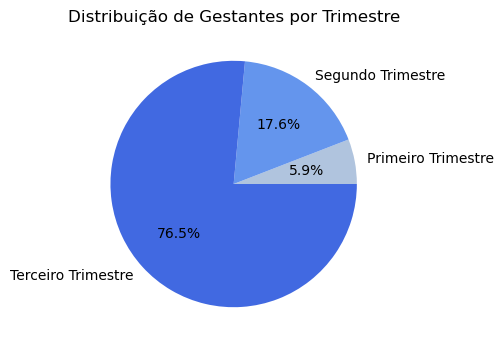

In [29]:
#Definindo cada variável
primeiro_trimestre = dados_gestantes.query('`Idade gestacional em semanas` <= 13')
segundo_trimestre = dados_gestantes.query('`Idade gestacional em semanas` > 13 and `Idade gestacional em semanas` <= 26')
terceiro_trimestre = dados_gestantes.query('`Idade gestacional em semanas` > 26')

# Dados de contagem por trimestre,shape[0] retorna a contagem de gestantes em cada um dos trimestres separados nos DataFrames
contagem_por_trimestre = [primeiro_trimestre.shape[0], segundo_trimestre.shape[0], terceiro_trimestre.shape[0]]
trimestres = ['Primeiro Trimestre', 'Segundo Trimestre', 'Terceiro Trimestre']

# Criando o gráfico de pizza
plt.figure(figsize=(6, 4))
plt.pie(contagem_por_trimestre, labels=trimestres, autopct='%1.1f%%', colors=['lightsteelblue','cornflowerblue', 'royalblue'])
plt.title('Distribuição de Gestantes por Trimestre')
plt.show()


**Diagrama de caixa**, a maior parte do código se refere a estrutura de cores do boxplot. Caso optassemos por um diagrama de caixa padrão, apenas o código **plt.boxplot(dados_gestantes['Idade gestacional em semanas'])** era necessário, sendo traçado um diagrama padrão na posição vertical.

Text(0.5, 0, 'Idade Gestacional (semanas)')

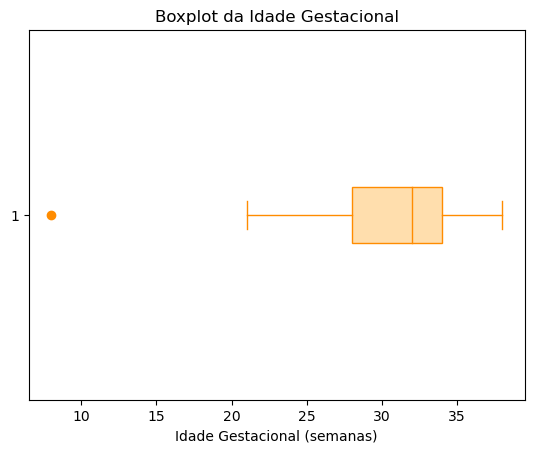

In [30]:
plt.boxplot(dados_gestantes['Idade gestacional em semanas'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor= 'navajowhite', edgecolor='darkorange'), medianprops=dict(color='darkorange'), 
            flierprops=dict(markerfacecolor='darkorange', markeredgecolor='darkorange'),whiskerprops=dict(color='darkorange'), 
            capprops=dict(color='darkorange'))
plt.title('Boxplot da Idade Gestacional')
plt.xlabel('Idade Gestacional (semanas)')

Após verificar a distribuição de gestantes por trimestres, também iremos tratar os outliers presentes na coluna 'Idade gestacional', não o fizemos anteriormente porque o tratamento iria interferir no construção de um gráfico de setores mais fidedigno. 

In [31]:
q1 = dados_gestantes['Idade gestacional em semanas'].quantile(0.25)
q3 = dados_gestantes['Idade gestacional em semanas'].quantile(0.75)
iqr = q3 - q1

# Calcula os limites para identificação de outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
    
print (limite_inferior)
print (limite_superior)

# Identifica os outliers por meio de uma List comprehension, irá retornar x para cada valor de x dentro da variável amplitude
#que ultrapasse o limite inferior ou superior.
outliers = [x for x in dados_gestantes['Idade gestacional em semanas'] if x < limite_inferior or x > limite_superior]
outliers

19.0
43.0


[8.0]

In [32]:
dados_gestantes['Idade gestacional em semanas'].describe()

count    17.000000
mean     30.133333
std       7.296118
min       8.000000
25%      28.000000
50%      32.000000
75%      34.000000
max      38.000000
Name: Idade gestacional em semanas, dtype: float64

In [33]:
# Substitui os outliers pela mediana usando loc
dados_gestantes.loc[(dados_gestantes['Idade gestacional em semanas'] < limite_inferior) | 
                    (dados_gestantes['Idade gestacional em semanas'] > limite_superior), 'Idade gestacional em semanas'] = 32

In [34]:
#verificamos se ainda existem valores discrepantes
#Usamos o @ para identificar que limite_inferior e limite_superior são variáveis e não strings.
dados_gestantes.query('`Idade gestacional em semanas` < @limite_inferior or `Idade gestacional em semanas` > @limite_superior')

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto


**Há uma correlação negativa  moderada entre a idade gestacional e o período entre o diagnóstico da infecção e o momento do parto. A maioria dos dados indica, portanto, que o diagnóstico ocorreu ao final da gestação, com diferença de poucos dias para o parto. Iremos traçar um gráfico de regressão linear apenas para visualização e treino, já que não queremos criar um modelo preditivo. Há uma correlação fraca entre a idade da gestante e a idade gestacional e o período entre o diagnóstico da infecção e o momento do parto.**

In [35]:
# Utilizando o método corr () para calcular a matriz de correlação para todas as colunas numéricas. 
dados_gestantes.corr()

,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto
Idade da gestante,1.000000,-0.238414,-0.314417
Idade gestacional em semanas,-0.238414,1.000000,-0.630728
dias entre infeccao e parto,-0.314417,-0.630728,1.000000


In [36]:
#Extração dos valores das colunas de interesse e armazenamento na variável indepedente e dependente, respectivamente:
X = dados_gestantes['dias entre infeccao e parto'].values
y = dados_gestantes['Idade gestacional em semanas'].values
X

array([ 3,  3,  0,  0,  0, 76,  4, 42, 33,  0, 46, 12, 26, 12, 74, 53,  6],
      dtype=int64)

In [37]:
#Utilizando a função np.corrcoef da biblioteca NumPy para calcular a matriz de correlação entre duas variáveis, X e y. 
correlacao = np.corrcoef(X, y)
correlacao

array([[ 1.       , -0.6307278],
       [-0.6307278,  1.       ]])

A matriz de correlação é uma matriz quadrada em que os elementos da diagonal principal sempre têm um valor de 1. Isso acontece porque a diagonal principal representa a correlação de cada variável consigo mesma, o que é sempre perfeito (correlação de 100%) - uma variável é sempre perfeitamente correlacionada com ela mesma.

O código X = X.reshape(-1, 1) está remodelando o array unidimensional X em uma matriz bidimensional, onde cada valor original de X é uma entrada na nova matriz. Isso é comum quando se prepara os dados para modelos de aprendizado de máquina, como regressão linear. O **valor -1**, indica que você quer que o NumPy calcule automaticamente o tamanho da primeira dimensão (número de linhas) para você, com base no tamanho total dos dados. Isso é útil quando você deseja manter o mesmo número total de elementos, mas deseja alterar a forma do array de uma dimensão para duas dimensões (matriz). **O valor 1,** define a segunda dimensão do array, que é o número de colunas. Neste caso, estamos criando uma matriz com uma única coluna. Desta forma, **o padrão -1, 1** é comumente usado para converter um array unidimensional em uma matriz bidimensional

In [38]:
X = X.reshape(-1, 1)
print (X)

[[ 3]
 [ 3]
 [ 0]
 [ 0]
 [ 0]
 [76]
 [ 4]
 [42]
 [33]
 [ 0]
 [46]
 [12]
 [26]
 [12]
 [74]
 [53]
 [ 6]]


Sobre o código **modelo = LinearRegression()**, quando você chama LinearRegression(), está criando uma instância vazia do modelo de regressão linear. Isso significa que você está criando um objeto que será capaz de realizar regressão linear, mas ainda não está configurado ou treinado para dados específicos. Desta forma, estamos criando um objeto de modelo de regressão linear vazio e atribuindo-o à variável modelo. Já quando chamamos o método **.fit(X, y)** , ele ajusta os parâmetros internos do modelo para que ele possa aprender a relação entre as **características(x, variável indepedente, preditoras)** e os **valores alvo(y, variável dependente, resposta)** nos dados de treinamento. Em outras palavras, o modelo está "aprendendo" a relação entre as características e os valores alvo com base nos dados de treinamento.
No contexto da regressão linear, o objetivo é encontrar a melhor linha reta que se ajusta aos dados de treinamento

In [39]:
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

**plt.scatter(X, y):** Esta linha de código cria um gráfico de dispersão (scatter plot) dos pontos de dados. Isso é feito usando as variáveis X e y.   
**plt.plot(X, modelo.predict(X), color='red')**: Esta linha de código plota a linha de regressão ajustada pelo modelo de regressão linear. Nesta abordagem,  estamos plotando as previsões do modelo (modelo.predict(X)) em relação às características de entrada (X). Isso faz sentido porque a regressão linear visa modelar a relação entre as variáveis independentes (características) e a variável dependente (valor alvo).  A reta de regressão é traçada ao longo das coordenadas X, representando as variáveis independentes.

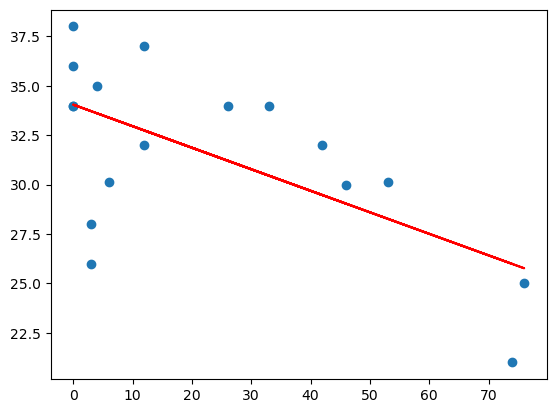

In [40]:
plt.scatter(X, y)
plt.plot(X,modelo.predict(X), color = 'red')

Podemos tentar prever qual seria a idade gestacional das gestantes que apresentavam os dados nulos: 53 dias e 6 dias.

In [41]:
modelo.predict([[53]])

array([28.2714578])

In [42]:
modelo.predict([[6]])

array([33.39012424])

Apesar da correlação moderada, como foram coletados poucos dados a amostra pode não ser representativa o suficiente da população total, o que pode levar a estimativas imprecisas da correlação. Além disso, com menos dados, a variabilidade dos valores pode ser maior, tornando a análise menos estável.